In [ ]:
"""
Project 2 README
=====================================

Name:
NumPy, Polynomial Regression, and Training vs. Test MSE

Purpose:

Use the scikit-learn module to obtain the data and split 
it into training and test sets, and NumPy to run linear regression. 
We will then use the Boston house prices dataset to try and predict 
the median value of a home given several features of its neighborhood.

Authors:

Brandon Ryan, Yi Wei Lee, Mina Moslehpour

Last modified by Brandon Ryan, October 14 2020

Experiments:

1.  Load and examine the Boston dataset’s features, target values, 
    and description.

2.  Use sklearn.model_selection.train_test_split() to split the features 
    and values into separate training and test sets. Use 80% of the original 
    data as a training set, and 20% for testing.

3.  Create a scatterplot of the training set showing the relationship 
    between the feature LSTAT and the target value MEDV. Does the 
    relationship appear to be linear?

4.  With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for 
    the training set. What is the equation for MEDV as a linear function 
    of LSTAT?

5.  Use w to add a line to your scatter plot from experiment (3). 
    How well does the model appear to fit the training set?

6.  Use w to find the response for each value of the LSTAT attribute in the 
    test set, then compute the test MSE 𝓛 for the model.

7.  Now add an x2 column to LSTAT’s x column in the training set, then 
    repeat experiments (4), (5), and (6) for MEDV as a quadratic function 
    of LSTAT. Does the quadratic polynomial do a better job of predicting 
    the values in the test set?

8.  Repeat experiment (4) with all 13 input features as X and using 
    np.linalg.solve(). (See the Appendix to Linear regression in vector 
    and matrix format for details.) Does adding additional features improve 
    the performance on the test set compared to using only LSTAT?

9.  Now add x2 columns for all 13 features, and repeat experiment (8). 
    Does adding quadratic features improve the performance on the test set 
    compared to using only linear features?

10. Compute the training MSE for experiments (8) and (9) and compare it to 
    the test MSE. What explains the difference?

11. Repeat experiments (9) and (10), adding x3 columns in addition to the 
    existing x and x2 columns for each feature. Does the cubic polynomial 
    do a better job of predicting the values in the training set? Does it do 
    a better job of predicting the values in the test set?


Platforms:

Jupyter Notebook

Libraries:

scikit-learn 
pandas
Matplotlib’s
numpy

"""

'\nProject 2 README\n=====================================\n\nName:\nNumPy, Polynomial Regression, and Training vs. Test MSE\n\nPurpose:\n\nUse the scikit-learn module to obtain the data and split \nit into training and test sets, and NumPy to run linear regression. \nWe will then use the Boston house prices dataset to try and predict \nthe median value of a home given several features of its neighborhood.\n\nAuthors:\n\nBrandon Ryan, Yi Wei Lee, Mina Moslehpour\n\nLast modified by Brandon Ryan, October 14 2020\n\nExperiments:\n\n1.  Load and examine the Boston dataset’s features, target values, \n    and description.\n\n2.  Use sklearn.model_selection.train_test_split() to split the features \n    and values into separate training and test sets. Use 80% of the original \n    data as a training set, and 20% for testing.\n\n3.  Create a scatterplot of the training set showing the relationship \n    between the feature LSTAT and the target value MEDV. Does the \n    relationship appear t

### 1. Load and examine the Boston dataset’s features, target values, and description.


In [ ]:
import numpy as np
import matplotlib.pyplot as plotter
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline
from sklearn import datasets

house_prices = datasets.load_boston()
print(house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 2. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split


# load into panda's type
df_boston_features = pd.DataFrame(data = house_prices.data, columns = house_prices.feature_names)
df_boston_target = pd.DataFrame(house_prices.target, columns = ['MEDV'])
df_boston_features.insert(len(df_boston_features.columns), 'TARGET', house_prices.target)

# Getting the LSTAT column to use as a Predictor of MEDV
LSTAT = df_boston_features['LSTAT'].values.reshape(-1,1)

# Getting MEDV column from Y and transforming to column vector
MEDV = df_boston_target['MEDV'].values.reshape(-1,1)

# Using train_test_split to have 80% train and 20% test data sizes
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(LSTAT, MEDV, test_size=0.2, random_state=0)
train, test = model_selection.train_test_split(df_boston_features, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(df_boston_features, df_boston_target, test_size=.2)


###3. Create a scatterplot of the training set showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

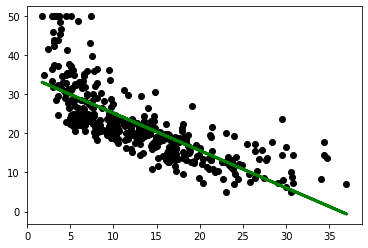

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plotter


model = LinearRegression()
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)

plotter.scatter(X_train, Y_train,  color='black')
plotter.plot(X_train, Y_train_pred, color='green', linewidth=3)
plotter.show()

No, the relationship between the feature LSTAT and the target value MEDV does not appear to be linear.

### 4. With LSTAT as X and MEDV as t, use np.linalg.inv() to compute w for the training set. What is the equation for MEDV as a linear function of LSTAT?

In [ ]:
 from numpy.linalg import inv

X = np.hstack((np.ones_like(LSTAT),LSTAT))
t = MEDV

XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w=np.dot(invXX,Xt)
w

array([[34.55384088],
       [-0.95004935]])

Therefore our equation for MEDV as a linear function of LSTAT is y = (-0.95004935)x + 34.55384088

### 5. Use w to add a line to your scatter plot from experiment (3). How well does the model appear to fit the training set?

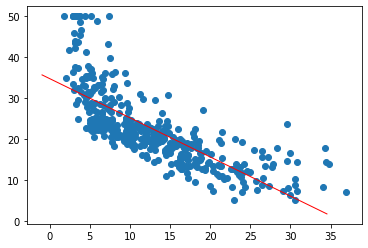

In [ ]:
from sklearn.metrics import mean_squared_error



##model = LinearRegression()
##model.fit(X_train, Y_train)
##Y_train_pred = model.predict(X_train)

##plotter.scatter(X_train, Y_train,  color='black')
##plotter.plot(X_train, Y_train_pred, color='green', linewidth=3)
##plotter.show()

predictValue = model.predict(w)

##plotter.figure()

plotter.scatter(X_train,Y_train)
plotter.plot(w,predictValue, color="red",linewidth=1.0, linestyle = '-')
plotter.show()


### 6. Use w to find the response for each value of the LSTAT attribute in the test set, then compute the test MSE 𝓛 for the model.

In [ ]:
##passing the wrong values to mean_squared_error(),
## and shouldn't be calling mean_squared_error() at all -- compute the answers yourself.
## y=mx+c
predict_wre = ((w[1] * X_test) + w[0])
##w, residuals = np.linalg.lstsq(w,LSTAT.T)
##MSE = np.mean(resuiduals)

##print(w.T.shape)
##print(X_test.shape)


#y_pred = np.hstack((np.ones_like(X_test),X_test))
##predict_wre = np.dot(y_pred,w)
#mse = np.square(np.subtract(y_pred, predict_wre)).mean()

#print(mse)

y_pred = np.array([])
for x in x_test['LSTAT']:
    y_pred = np.append(y_pred, x*w[1][0]+w[0][0])
    
mse = np.square(np.subtract(y_pred, predict_wre)).mean()
print(mse)

85.7146766877445


### 7. Now add an x2 column to LSTAT’s x column in the training set, then repeat experiments (4), (5), and (6) for MEDV as a quadratic function of LSTAT. Does the quadratic polynomial do a better job of predicting the values in the test set?

In [ ]:
## using np.polyfit() and np.polyval() to use np.linalg.inv() and/or np.np.linalg.lstsq() as directed


from numpy.linalg import inv

x2 = np.square(X_train)
x2 = np.array(x2).reshape([-1,1])
X = np.hstack((np.ones_like(x2),np.array(train['LSTAT']).reshape([-1,1]), x2))
t = np.array(Y_train).reshape([-1,1])
XX2 = np.dot(X.T,X)
invXX2 = np.linalg.inv(XX2)
Xt2 = np.dot(X.T, t)
w2 = np.dot(invXX2, Xt2)
print(w2)


[[43.1090092 ]
 [-2.36696305]
 [ 0.04463347]]


Text(0, 0.5, 'MEDV')

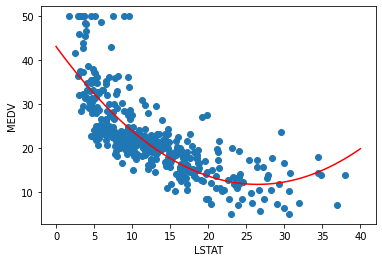

In [ ]:
## only one line

from sklearn.metrics import mean_squared_error

plotter.scatter(x_train['LSTAT'], y_train)
x = np.linspace(0, 40, 100)
plotter.plot(x, (x**2)*w2[2][0]+x*w2[1][0]+ w2[0][0], color='red')
plotter.xlabel('LSTAT')
plotter.ylabel('MEDV')


In [ ]:
### using np.polyfit() and np.polyval() to use np.linalg.inv() and/or np.np.linalg.lstsq() as directed


y_pred2 = np.array([])
for x in x_test['LSTAT']:
    y_pred2 = np.append(y_pred2, x*w[1][0]+w[0][0])
    
mse = np.square(np.subtract(y_pred, predict_wre)).mean()
print(mse)




85.7146766877445


yes, it turns out that they both have similar result.

### 8. Repeat experiments (4) and (6) with all 13 input features as X and using np.linalg.lstsq(). (See the Appendix to Linear regression in vector and matrix format for details of why we need to switch away from np.linalg.inv(), and the notes for np.linalg.solve() for why we shouldn’t use that either.) Does adding additional features improve the performance on the test set compared to using only LSTAT?


In [ ]:


#for feature in df_boston_features:
#  X_all = np.hstack((np.ones_like(feature),feature))
#  t = MEDV
#  XX = np.dot(X_all.T, X_all)
#  invXX = np.linalg.inv(XX)
#  Xt = np.dot(X_all.T, t)
#  w = np.dot(invXX , Xt)

 # print(w)

X_all = train[[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]].to_numpy()
X_all = np.hstack((
    np.ones((X_all.shape[0], 1)),
    X_all
))
result = np.linalg.lstsq(X_all, train["TARGET"], rcond=None)
w8 = result[0]
r = result[1]

print(w8)
print(r)

[ 3.80916949e+01 -1.19443447e-01  4.47799511e-02  5.48526168e-03
  2.34080361e+00 -1.61236043e+01  3.70870901e+00 -3.12108178e-03
 -1.38639737e+00  2.44178327e-01 -1.09896366e-02 -1.04592119e+00
  8.11010693e-03 -4.92792725e-01]
[7807.89396225]


No the adding of additional features does not improve the performance on the test set compared to using only LSTAT.


### 9. Now add x2 columns for all 13 features, and repeat experiment (8). Does adding quadratic features improve the performance on the test set compared to using only linear features?

In [ ]:
#x = X_all[:,0][:,None]
#t = X_all[:,1][:,None]

X_all_squared = X_all**2
result = np.linalg.lstsq(X_all_squared, train["TARGET"], rcond=None)

w9 = result[0]
r = result[1]

print(w9)
print(r)
#for i in range(1, 14):
#    X = np.hstack((X, x**i))


[ 2.05502251e+01 -1.57160836e-03  5.09383176e-04  3.34634444e-03
  2.43599448e+00 -1.10453733e+01  4.32862823e-01 -1.51185689e-04
 -7.89607344e-02  6.83007707e-03 -1.24543623e-05 -3.14364636e-02
  2.41652558e-05 -7.54293220e-03]
[8786.83685322]


### 10. Compute the training MSE for experiments (8) and (9) and compare it to the test MSE. What explains the difference?

In [ ]:
X = np.hstack((np.ones((X_train.shape[0],1)),X_train))
t = Y_train
w = np.linalg.lstsq(X,t, rcond=None)
train_data = np.hstack((np.ones((X_train.shape[0],1)),X_train))
test_data = np.hstack((np.ones((X_test.shape[0],1)),X_test))
pred_train = np.dot(train_data,w[0])
pred_test = np.dot(test_data,w[0])
train_MSE = mean_squared_error(Y_train,pred_train)
test_MSE = mean_squared_error(Y_test,pred_test)
print("All train MSE: ", train_MSE)
print("All test MSE: ", test_MSE)

X = np.hstack((np.ones((X_train.shape[0],1)),X_train,X_train*X_train))
t = Y_train
w = np.linalg.lstsq(X,t,rcond=None)
train_data = np.hstack((np.ones((X_train.shape[0],1)),X_train,X_train*X_train))
test_data = np.hstack((np.ones((X_test.shape[0],1)),X_test,X_test*X_test))
pred_train = np.dot(train_data,w[0])
pred_test = np.dot(test_data,w[0])
train_MSE = mean_squared_error(Y_train,pred_train)
test_MSE = mean_squared_error(Y_test,pred_test)
print("All train MSE for ^2: ", train_MSE)
print("All test MSE for ^2: ", test_MSE)



All train MSE:  36.52396640695966
All test MSE:  46.336305360025946
All train MSE for ^2:  28.18917233416823
All test MSE for ^2:  38.8468686617073


The difference can be explained by the increase in dimensions of the training data which translates to comparatively better test MSE, i.e 1.675 with 1 dimension and then 4.878 with 2 dimensions.

### 11. Repeat experiments (9) and (10), adding x3 columns in addition to the existing x and x2 columns for each feature. Does the cubic polynomial do a better job of predicting the values in the training set? Does it do a better job of predicting the values in the test set?

In [ ]:
X = np.hstack((np.ones((X_train.shape[0],1)),X_train,X_train*X_train*X_train))
t = Y_train
w = np.linalg.lstsq(X,t,rcond=None)
train_data = np.hstack((np.ones((X_train.shape[0],1)),X_train,X_train*X_train*X_train))
test_data = np.hstack((np.ones((X_test.shape[0],1)),X_test,X_test*X_test*X_test))
pred_train = np.dot(train_data,w[0])
pred_test = np.dot(test_data,w[0])
train_MSE = mean_squared_error(Y_train,pred_train)
test_MSE = mean_squared_error(Y_test,pred_test)
print("All train MSE for ^3: ", train_MSE)
print("All test MSE for ^3: ", test_MSE)



All train MSE for ^3:  29.5194107271717
All test MSE for ^3:  40.38105526776957


Yes the cubic polynomial does a better job of predicting the values in the training set as well as the test set and exhibits overfitting.